### Local Setup

In [1]:
from pathlib import Path
import sys

# Make this path be the project's "base" directory, so we can include modules
notebook_directory_ancestor = Path.cwd().resolve().parent.parent.parent.parent
print(notebook_directory_ancestor)
core_code_directory = notebook_directory_ancestor / "PythonLibraries" / "CoreCode"

is_core_code_directory_in_sys_path = str(core_code_directory) in sys.path
is_notebook_directory_ancestor_in_sys_path = str(notebook_directory_ancestor) in sys.path
print("Is CoreCode directory in sys.path?", is_core_code_directory_in_sys_path)
print("Is notebook directory's ancestor in sys.path?", is_notebook_directory_ancestor_in_sys_path)

if not is_core_code_directory_in_sys_path:
    sys.path.append(str(core_code_directory))
    
from corecode.Utilities import (
    DataSubdirectories,
    )
data_sub_dirs = DataSubdirectories()

/InServiceOfX
Is CoreCode directory in sys.path? False
Is notebook directory's ancestor in sys.path? False


In [2]:
instant_id_path = notebook_directory_ancestor.parent / "ThirdParty" / "InstantID"
if (instant_id_path.exists() and str(instant_id_path) not in sys.path):
    sys.path.append(str(instant_id_path))

In [3]:
more_insight_face_directory = notebook_directory_ancestor / "PythonLibraries" / "ThirdParties" / "MoreInsightFace"
if (more_insight_face_directory.exists() and str(more_insight_face_directory) not in sys.path):
    sys.path.append(str(more_insight_face_directory))
    print("added MoreInsightFace")

added MoreInsightFace


In [2]:
controlnet_path = data_sub_dirs.ModelsDiffusion / "InstantX" / "InstantID" / "ControlNetModel"
print(controlnet_path.exists())

True


In [14]:
from diffusers.models import ControlNetModel
from diffusers.utils.torch_utils import is_compiled_module
import torch

In [4]:
controlnet = ControlNetModel.from_pretrained(controlnet_path)

In [6]:
isinstance(controlnet, ControlNetModel)

True

In [9]:
help(is_compiled_module)

Help on function is_compiled_module in module diffusers.utils.torch_utils:

is_compiled_module(module) -> bool
    Check whether the module was compiled with torch.compile()



In [11]:
is_compiled_module(controlnet)

False

In [12]:
controlnet.config

FrozenDict([('in_channels', 4),
            ('conditioning_channels', 3),
            ('flip_sin_to_cos', True),
            ('freq_shift', 0),
            ('down_block_types',
             ['DownBlock2D', 'CrossAttnDownBlock2D', 'CrossAttnDownBlock2D']),
            ('mid_block_type', 'UNetMidBlock2DCrossAttn'),
            ('only_cross_attention', False),
            ('block_out_channels', [320, 640, 1280]),
            ('layers_per_block', 2),
            ('downsample_padding', 1),
            ('mid_block_scale_factor', 1),
            ('act_fn', 'silu'),
            ('norm_num_groups', 32),
            ('norm_eps', 1e-05),
            ('cross_attention_dim', 2048),
            ('transformer_layers_per_block', [1, 2, 10]),
            ('encoder_hid_dim', None),
            ('encoder_hid_dim_type', None),
            ('attention_head_dim', [5, 10, 20]),
            ('num_attention_heads', None),
            ('use_linear_projection', True),
            ('class_embed_type', None),
    

In [16]:
controlnet.config.global_pool_conditions

False

In [17]:
controlnet.dtype

torch.float16

In [15]:
# See diffusers/models/controlnet.py and __init__(..)
controlnet = ControlNetModel.from_pretrained(
    controlnet_path,
    torch_dtype=torch.float16,
    use_safetensors=True,
    local_files_only=True)

In [21]:
from pipeline_stable_diffusion_xl_instantid import StableDiffusionXLInstantIDPipeline

self.do_classifier_free_guidance is not defined as a class member that is inherited in, say, an __init__() or a class member function, rather, it is decorated with @property as a class member function that takes as input `self`. This property is not inherited, but manually copied for each Python class that needs it.

See for example pipeline_stable_diffusion_xl.py in pipelines/stable_diffusion_xl of diffusers, but there are multiple examples of this.

In [22]:
StableDiffusionXLInstantIDPipeline.do_classifier_free_guidance

In [23]:
model_subdir = data_sub_dirs.ModelsDiffusion / "fluently" / "Fluently-XL-v4"
print(model_subdir)
print(model_subdir.exists())

/Data/Models/Diffusion/fluently/Fluently-XL-v4
True


In [24]:
%time
pipe = StableDiffusionXLInstantIDPipeline.from_pretrained(
    str(model_subdir),
    controlnet=controlnet,
    #revision="fp16",
    torch_dtype=torch.float16,
    local_files_only=True,)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 4.53 µs


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

cached_folder:  /Data/Models/Diffusion/fluently/Fluently-XL-v4
name:  text_encoder
{'torch_dtype': torch.float16, 'device_map': None, 'max_memory': None, 'offload_folder': None, 'offload_state_dict': False, 'low_cpu_mem_usage': True}
cached_folder:  /Data/Models/Diffusion/fluently/Fluently-XL-v4
name:  tokenizer_2
{}
cached_folder:  /Data/Models/Diffusion/fluently/Fluently-XL-v4
name:  tokenizer
{}
cached_folder:  /Data/Models/Diffusion/fluently/Fluently-XL-v4
name:  scheduler
{}
cached_folder:  /Data/Models/Diffusion/fluently/Fluently-XL-v4
name:  vae
{'torch_dtype': torch.float16, 'device_map': None, 'max_memory': None, 'offload_folder': None, 'offload_state_dict': False, 'variant': None, 'low_cpu_mem_usage': True}
cached_folder:  /Data/Models/Diffusion/fluently/Fluently-XL-v4
name:  text_encoder_2
{'torch_dtype': torch.float16, 'device_map': None, 'max_memory': None, 'offload_folder': None, 'offload_state_dict': False, 'low_cpu_mem_usage': True}
cached_folder:  /Data/Models/Diffusio

The attribute `self._guidance_scale` and therefore also properties `do_classifier_free_guidance` only come into existence on a `__call__` call, see pipelines/controlnet/pipeline_controlnet_sd_xl.py and `__call__` function definition for the class. Also notice that do_classifier_free_guidance is defined as a class member function and decorated with a `@property` - treat this as syntactic sugar at a rudimentary level.

Also, note that guidance scale comes in as an optional parameter in the call function, with default value at 5.0.

In [53]:
# AttributeError
# AttributeError: 'StableDiffusionXLInstantIDPipeline' object has no attribute '_guidance_scale'
#print(pipe.do_classifier_free_guidance)
#print(type(pipe.do_classifier_free_guidance))
#print(pipe._guidance_scale())
#print(type(pipe._guidance_scale))

# AttributeError: 'StableDiffusionXLInstantIDPipeline' object has no attribute '_guidance_scale'
#StableDiffusionXLInstantIDPipeline.do_classifier_free_guidance.__get__(pipe)

#AttributeError: 'StableDiffusionXLInstantIDPipeline' object has no attribute '_guidance_scale'
#StableDiffusionXLInstantIDPipeline.guidance_scale.__get__(pipe)

# AttributeError: 'StableDiffusionXLInstantIDPipeline' object has no attribute '_guidance_scale'
#pipe._guidance_scale

In [55]:
print(pipe.unet.config.time_cond_proj_dim)
print(type(pipe.unet.config.time_cond_proj_dim))

None
<class 'NoneType'>


guess_mode is default False in `__call__` in pipeline_stable_diffusion_xl_instantid.py of InstantID.

In [57]:
global_pool_conditions = (
    controlnet.config.global_pool_conditions
    if isinstance(controlnet, ControlNetModel)
    else controlnet.nets[0].config.global_pool_conditions)
print(global_pool_conditions)
print(type(global_pool_conditions))
guess_mode = False
guess_mode = guess_mode or global_pool_conditions
print(guess_mode)

False
<class 'bool'>
False


latents is optional with default None in `__call__` for pipeline_stable_diffusion_xl_instantid.py.

In [58]:
num_channels_latents = pipe.unet.config.in_channels
print(type(num_channels_latents))
print(num_channels_latents)

#if prompt is not None and isinstance(prompt, str):
batch_size = 1
#default value in this input
num_images_per_prompt = 1
latents = pipe.prepare_latents(
    batch_size * num_images_per_prompt,
    num_channels_latents,
    
)

<class 'int'>
4


In [5]:
from moreinsightface.Wrappers import FaceAnalysisWrapper

/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [7]:
def get_pose_information(model_name, model_root_directory, image_path):
    """
    By creating an object for FaceAnalysisWrapper, which wraps FaceAnalysis, within this function, the
    object goes out of scope once the function is done.
    """
    face_analysis_wrapper = FaceAnalysisWrapper(model_name, model_root_directory)
    pose_information = face_analysis_wrapper.get_pose_info_from_image(
        image_path)
    return pose_information

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'prefer_nhwc': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_max_tuning_duration_ms': '0', 'use_ep_level_unified_stream': '0', 'tunable_op_enable': '0', 'enable_cuda_graph': '0', 'cudnn_conv_use_max_workspace': '1', 'do_copy_in_default_stream': '1', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'gpu_external_empty_cache': '0', 'gpu_external_free': '0', 'tunable_op_tuning_enable': '0', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_external_alloc': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'has_user_compute_stream': '0', 'gpu_mem_limit': '18446744073709551615', 'device_id': '0'}}
find model: /Data/Models/Diffusion/InstantX/antelopev2/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'prefer_nhwc': '0'

/ThirdParty/insightface/python-package/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


<class 'moreinsightface.Wrappers.FaceAnalysisWrapper.PoseInformation'>
<class 'PIL.Image.Image'>
1280
853


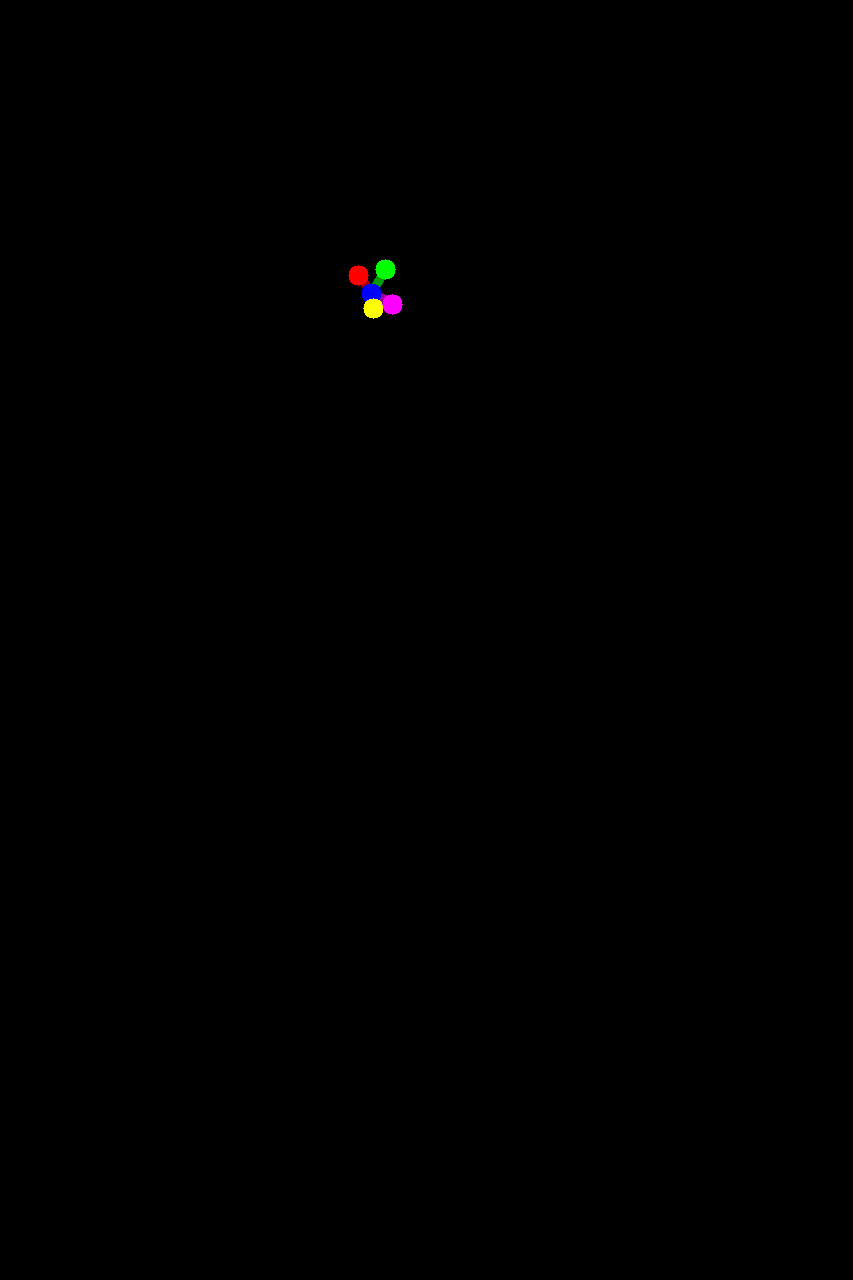

In [8]:
pose_information = get_pose_information(
    "antelopev2",
    "/Data/Models/Diffusion/InstantX",
    data_sub_dirs.Public / "Images" / "Playboy" / "TeddiSmith" / "U6S88ytE0BQ.jpg")

print(type(pose_information))
print(type(pose_information.pose_keypoints))
print(pose_information.height)
print(pose_information.width)
pose_information.pose_keypoints.show()

In [63]:
#face_analysis_wrapper = FaceAnalysisWrapper("antelopev2", "/Data/Models/Diffusion/InstantX")

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'prefer_nhwc': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_max_tuning_duration_ms': '0', 'use_ep_level_unified_stream': '0', 'tunable_op_enable': '0', 'enable_cuda_graph': '0', 'cudnn_conv_use_max_workspace': '1', 'do_copy_in_default_stream': '1', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'gpu_external_empty_cache': '0', 'gpu_external_free': '0', 'tunable_op_tuning_enable': '0', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_external_alloc': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'has_user_compute_stream': '0', 'gpu_mem_limit': '18446744073709551615', 'device_id': '0'}}
find model: /Data/Models/Diffusion/InstantX/antelopev2/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'prefer_nhwc': '0'

In [4]:
#pose_information = face_analysis_wrapper.get_pose_info_from_image(
#    data_sub_dirs.Public / "Images" / "Playboy" / "TeddiSmith" / "U6S88ytE0BQ.jpg")
#print(type(pose_information))
#print(type(pose_information.pose_keypoints))
#print(pose_information.height)
#print(pose_information.width)
#pose_information.pose_keypoints.show()

In [ ]:
pose_inform